In [1]:
from matplotlib import pyplot as plt
import cv2

def show_figures(imgs, name = None):
  qtd = len(imgs)
  assert qtd > 0, "ta de sacanagem ne"
  plt.figure(figsize=(10*qtd, 10))
  for i in range(len(imgs)):
    plt.subplot(1, qtd, i+1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))

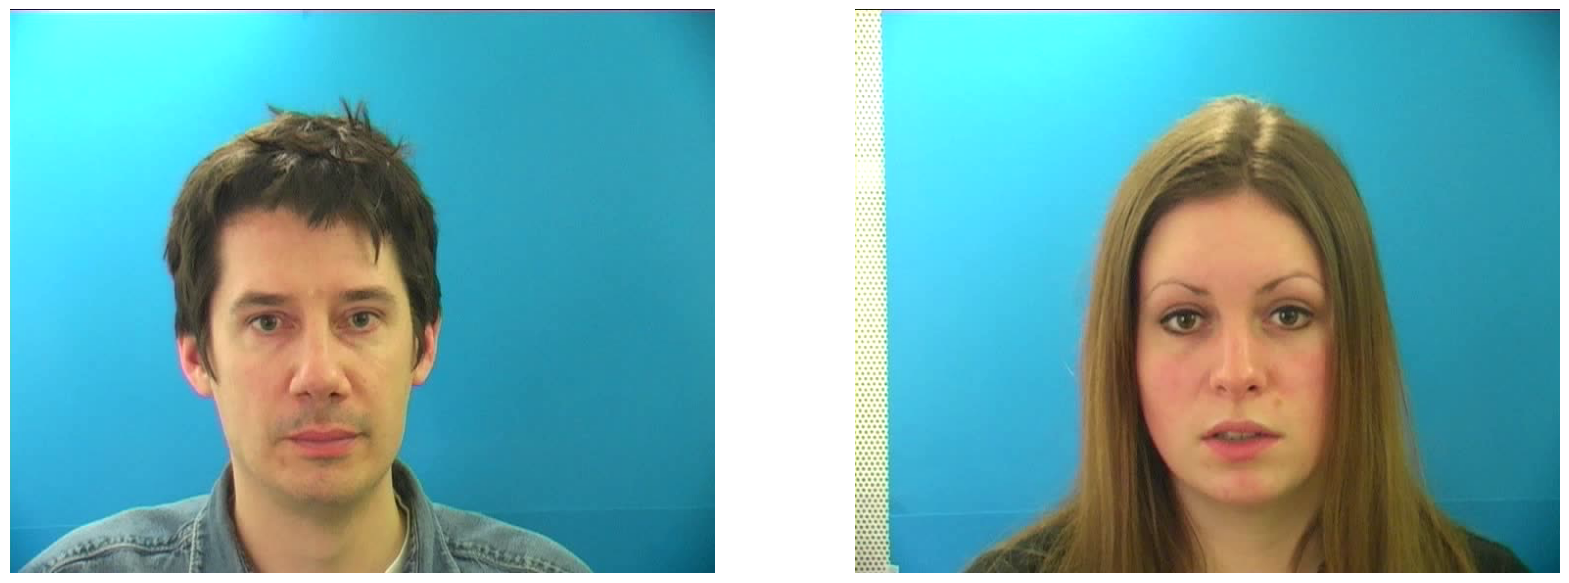

In [2]:
imgs = ["images/bbaf2n.mpg", "images/bbad3n.mpg"]
frames = []

for img in imgs:
  c1 = cv2.VideoCapture(img)
  _, frame = c1.read()
  frames.append(frame)

# cv2.imwrite("./images/grid_example_1.png", frames[0])
# cv2.imwrite("./images/grid_example_2.png", frames[1])

show_figures(frames, "./images/grid_example.png")

(39, 79, 3)


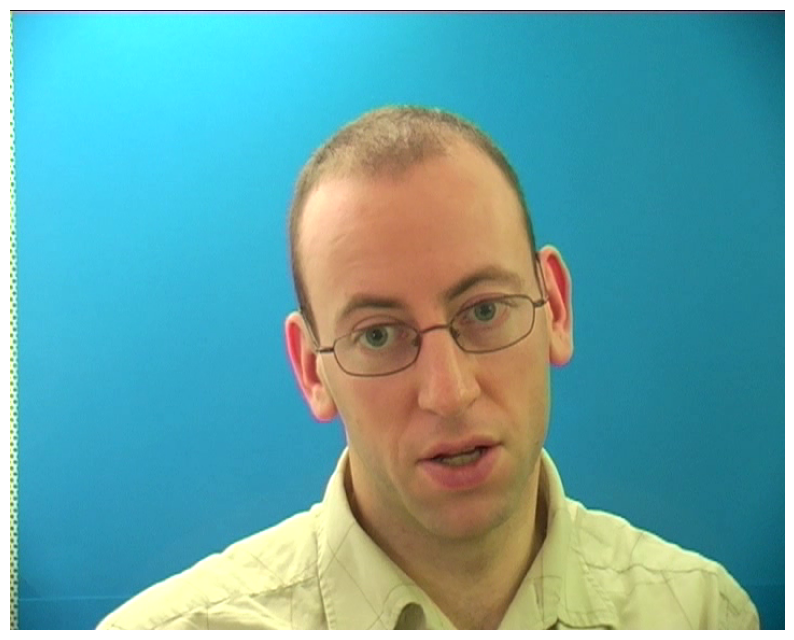

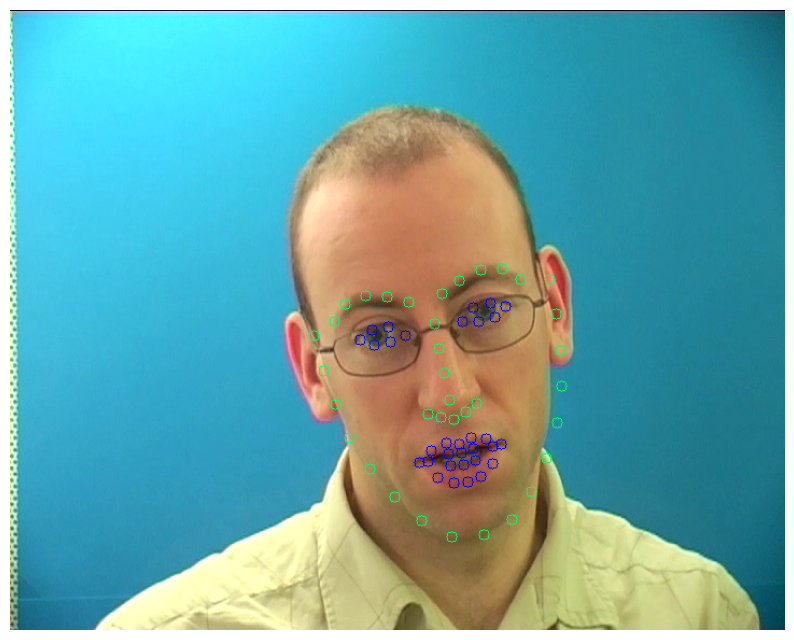

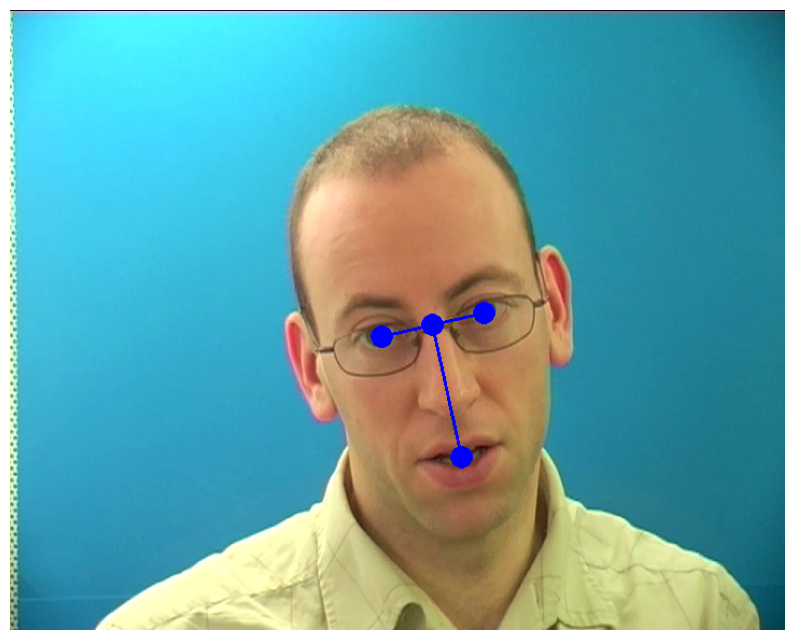

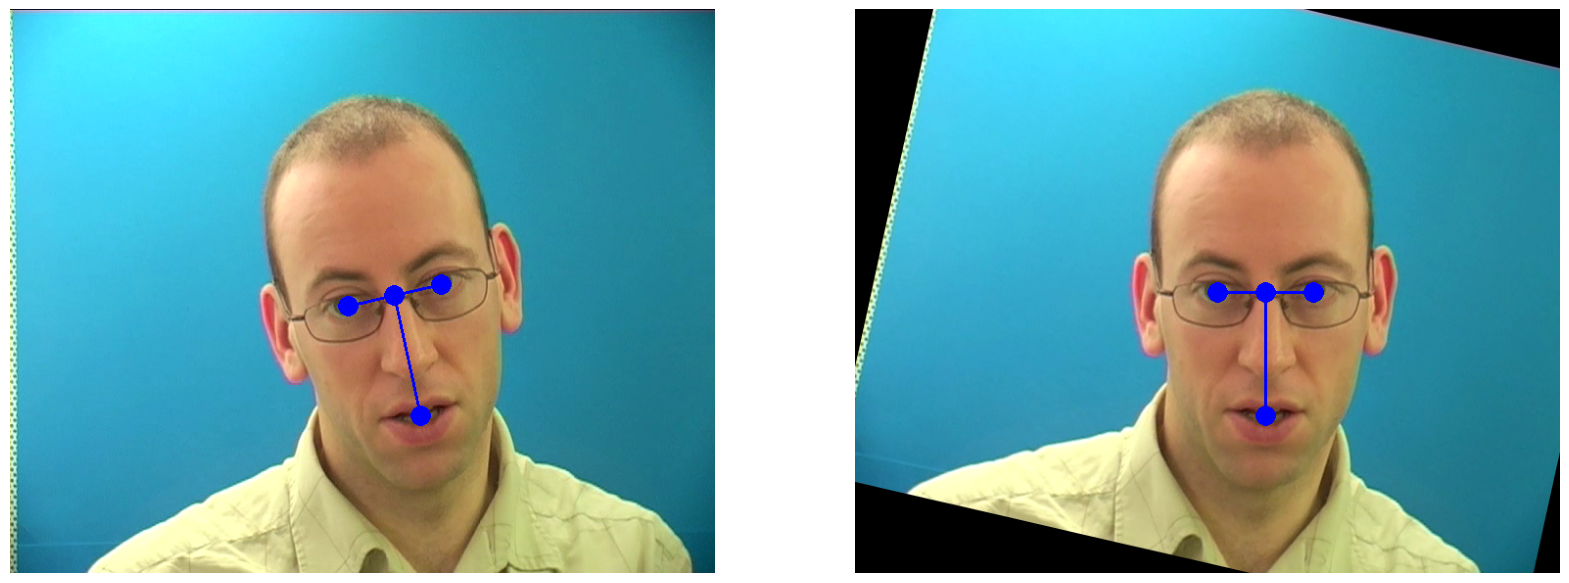

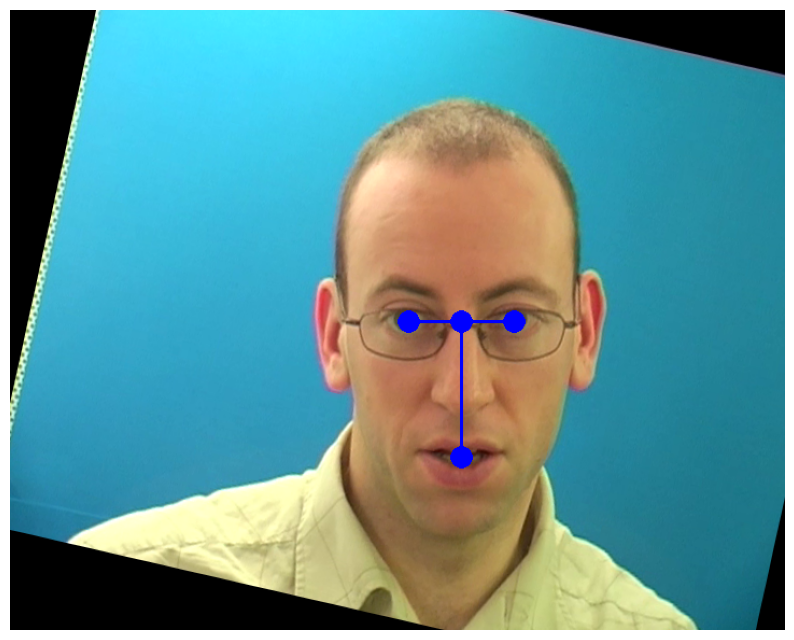

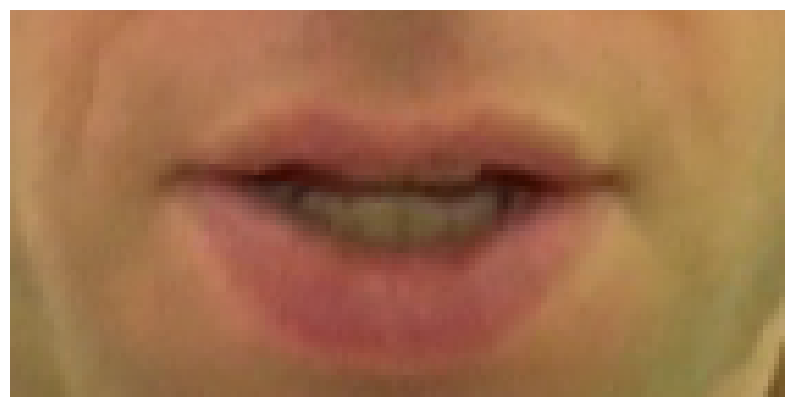

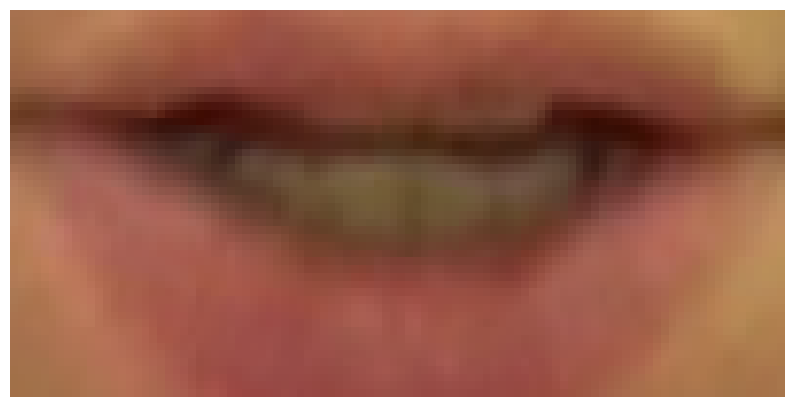

In [2]:
import cv2
from preprocessing.mouth_extraction import FaceFrame

input_video = "images/bbac5n.mpg"

c1 = cv2.VideoCapture(input_video)
for i in range(60):
  _, frame = c1.read()

f_obj = FaceFrame(frame)

circles = frame.copy()

for i in range(len(f_obj.lm)):
  if i in list(range(36, 68)):
    cv2.circle(circles, f_obj.lm[i], 5, (255, 0, 0), 1)
    
  else:
    cv2.circle(circles, f_obj.lm[i], 5, (100, 255, 0), 1)
  
l_eye, r_eye, mouth = [f_obj.l_eye, f_obj.r_eye, f_obj.mouth]

import numpy as np

def draw_triangle(frame, points):
  x = lambda a: (int(a[0]), int(a[1]))
  triangle = frame.copy()
  mid_eyes = np.mean([points[0][0], points[1][0]]), np.mean([points[0][1], points[1][1]])
  cv2.circle(triangle, x(mid_eyes), 5, (255, 0, 0), 10)
  cv2.circle(triangle, x(points[0]), 5, (255, 0, 0), 10)
  cv2.circle(triangle, x(points[1]), 5, (255, 0, 0), 10)
  cv2.circle(triangle, x(points[2]), 5, (255, 0, 0), 10)
  cv2.line(triangle, x(points[0]), x(points[1]), (255, 0, 0), 2)
  cv2.line(triangle, x(mid_eyes), x(points[2]), (255, 0, 0), 2)
  # for i in range(len(points)):
    # point = int(points[i][0]), int(points[i][1])
    # prev_point = int(points[i-1][0]), int(points[i-1][1])
    # cv2.circle(triangle, point, 5, (255, 0, 0), 10)

  return triangle

centers = draw_triangle(frame, [l_eye, r_eye, mouth])

f_obj.transform()

affine = draw_triangle(f_obj.img, [f_obj.l_eye, f_obj.r_eye, f_obj.mouth])

mouth_crop = f_obj.get_mouth_img(70, "crop")
temp_resize = f_obj.get_mouth_img(70, "resize")
print(temp_resize.shape)
mouth_resize = cv2.resize(temp_resize, (100, 50))

# points = [l_eye, r_eye, mouth]
# for i in range(len(points)):
#   point = int(points[i][0]), int(points[i][1])
#   prev_point = int(points[i-1][0]), int(points[i-1][1])
#   cv2.circle(frame, point, 5, (255, 0, 0), 10)
#   cv2.line(frame, point, prev_point, (255, 0, 0), 2)

# cv2.imwrite("./images/pre-1-landmarks.png", circles)
# cv2.imwrite("./images/pre-2-centers.png", centers)
# cv2.imwrite("./images/pre-3-affine.png", affine)

show_figures([frame])
show_figures([circles])
show_figures([centers])
show_figures([centers, affine])
show_figures([affine])
show_figures([mouth_crop])
show_figures([mouth_resize])

<AxesSubplot:xlabel='Época', ylabel='Perda'>

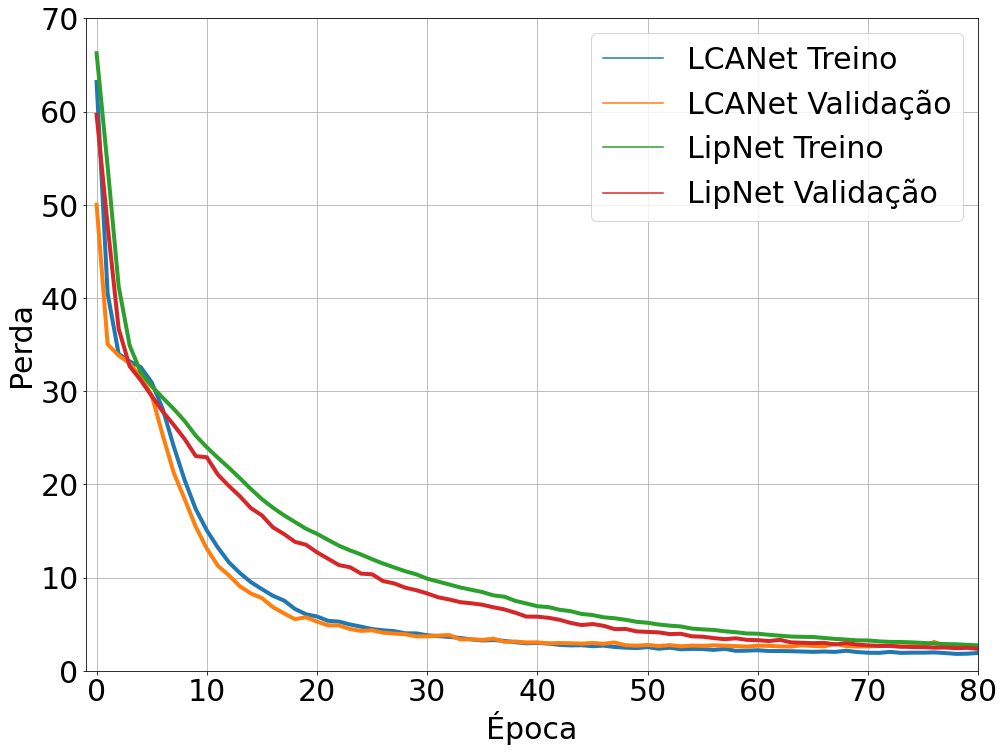

In [21]:
logs = {
  "LCANet Treino": "logs/run-lcanet_resize_2_o_20230607-113152_train-tag-epoch_loss.csv",
  "LCANet Validação": "logs/run-lcanet_resize_2_o_20230607-113152_validation-tag-epoch_loss.csv",
  "LipNet Treino": "logs/run-lipnet_rgb_jitter_3_o_20230421-004950_train-tag-epoch_loss.csv",
  "LipNet Validação": "logs/run-lipnet_rgb_jitter_3_o_20230421-004950_validation-tag-epoch_loss.csv"
}

import pandas as pd


import seaborn as sns
from matplotlib import pyplot as plt

# sns.lineplot()
for log in logs:
  logs[log] = pd.read_csv(logs[log]).Value

df = pd.DataFrame(logs)
plt.figure(figsize=(16, 12))
plt.rcParams.update({"font.size": 30})
plt.xlim((-1, 80))
plt.ylim(( 0, 70))
plt.grid(True)
plt.xlabel("Época")
plt.ylabel("Perda")
sns.lineplot(data=df, dashes=False, linewidth=4)

In [82]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            x = n*h_spacing + left
            y = layer_top - m*v_spacing
            circle = plt.Circle((x, y), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # plt.text(x-(left)/2, y, "This is a Circle")
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

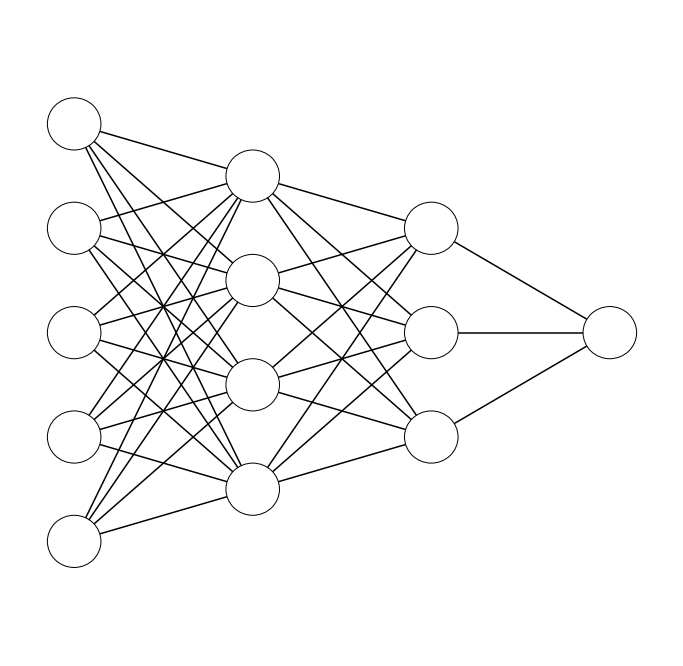

In [90]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 4, 3, 1])
# fig.savefig('nn.png')

<AxesSubplot:>

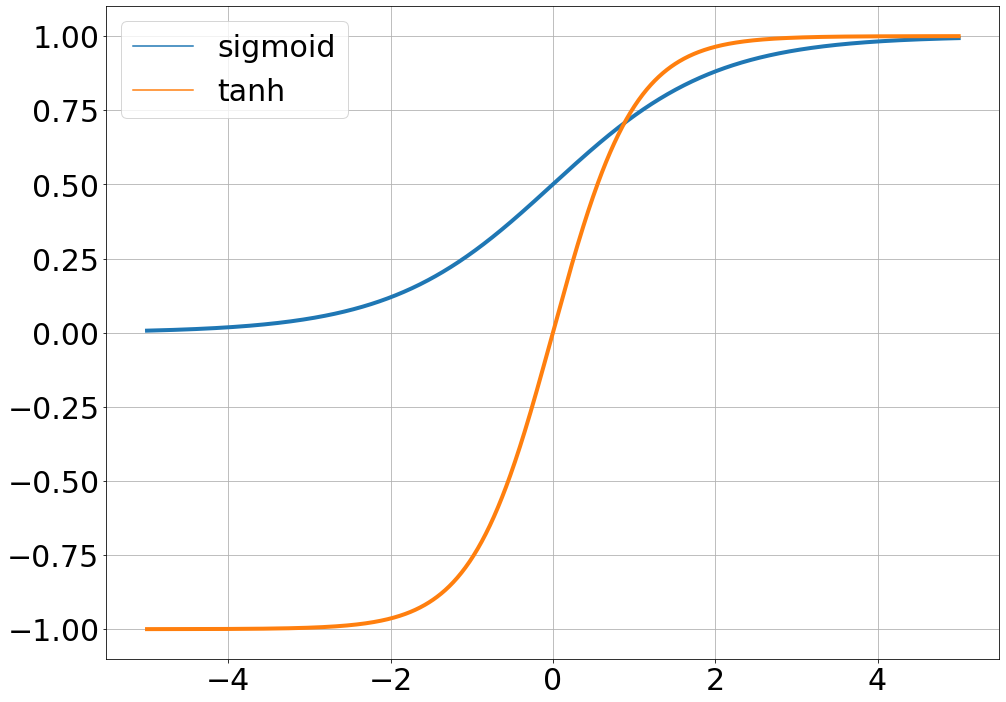

In [22]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def tahn(x):
  return math.tanh(x)

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
b, e = -5, 5
d = dict()
X = np.linspace(b, e, 1000)
d["sigmoid"] = [sigmoid(x) for x in X]
d["tanh"] = [tahn(x) for x in X]
d = pd.DataFrame(d)
d = d.set_index(X)

plt.figure(figsize=(16, 12))
plt.rcParams.update({"font.size": 30})
plt.grid(True)
plt.ylim(-1.1, 1.1)
sns.lineplot(data = d, dashes=False, linewidth=4)
# d